## Thư Viện


In [108]:
!pip install numpy opencv-python matplotlib


Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\hquan\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [109]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Load Ảnh

In [110]:
image_path = "Counting/cat.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [111]:
image

array([[214, 211, 220, ..., 210, 214, 221],
       [117, 120, 113, ..., 150, 154, 164],
       [138, 158, 156, ..., 187, 195, 188],
       ...,
       [131, 153, 105, ..., 213, 249, 176],
       [127, 153, 118, ..., 246, 255, 186],
       [138, 138, 117, ..., 171, 174, 116]], dtype=uint8)

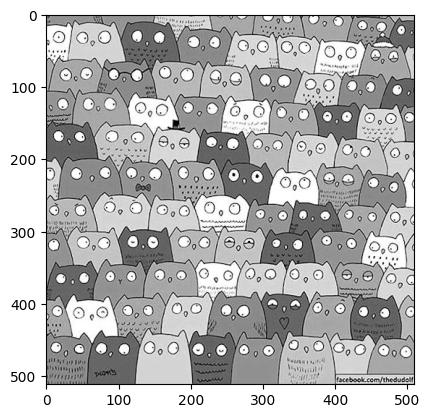

In [112]:
plt.imshow(image, cmap="gray")

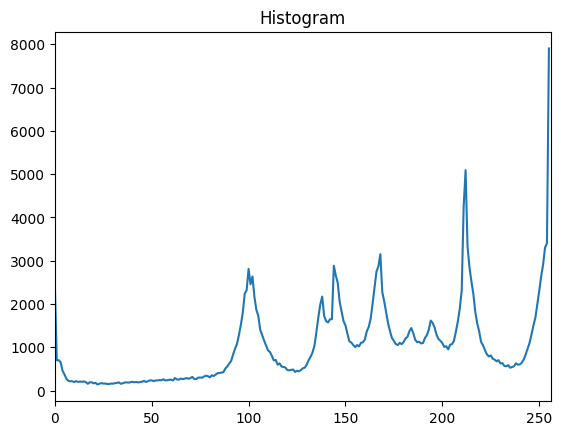

In [113]:
# Tính histogram
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# Vẽ histogram
plt.title("Histogram")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


## Sử dụng phương pháp cắt ngưỡng

In [114]:
_, binary_image = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV) # Chuyển sang ảnh nhị phân bằng ngưỡng cố định

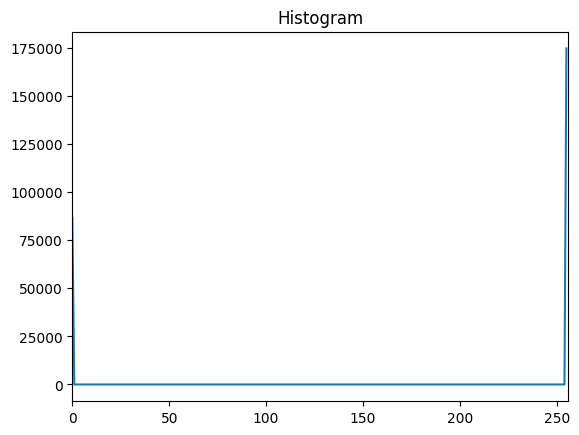

In [115]:
# Tính histogram
hist = cv2.calcHist([binary_image], [0], None, [256], [0, 256])

# Vẽ histogram
plt.title("Histogram")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()


In [116]:
# Thực hiện opening để loại bỏ nhiễu
kernel = np.ones((5, 5), np.uint8)
opened_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel, iterations=1)

33


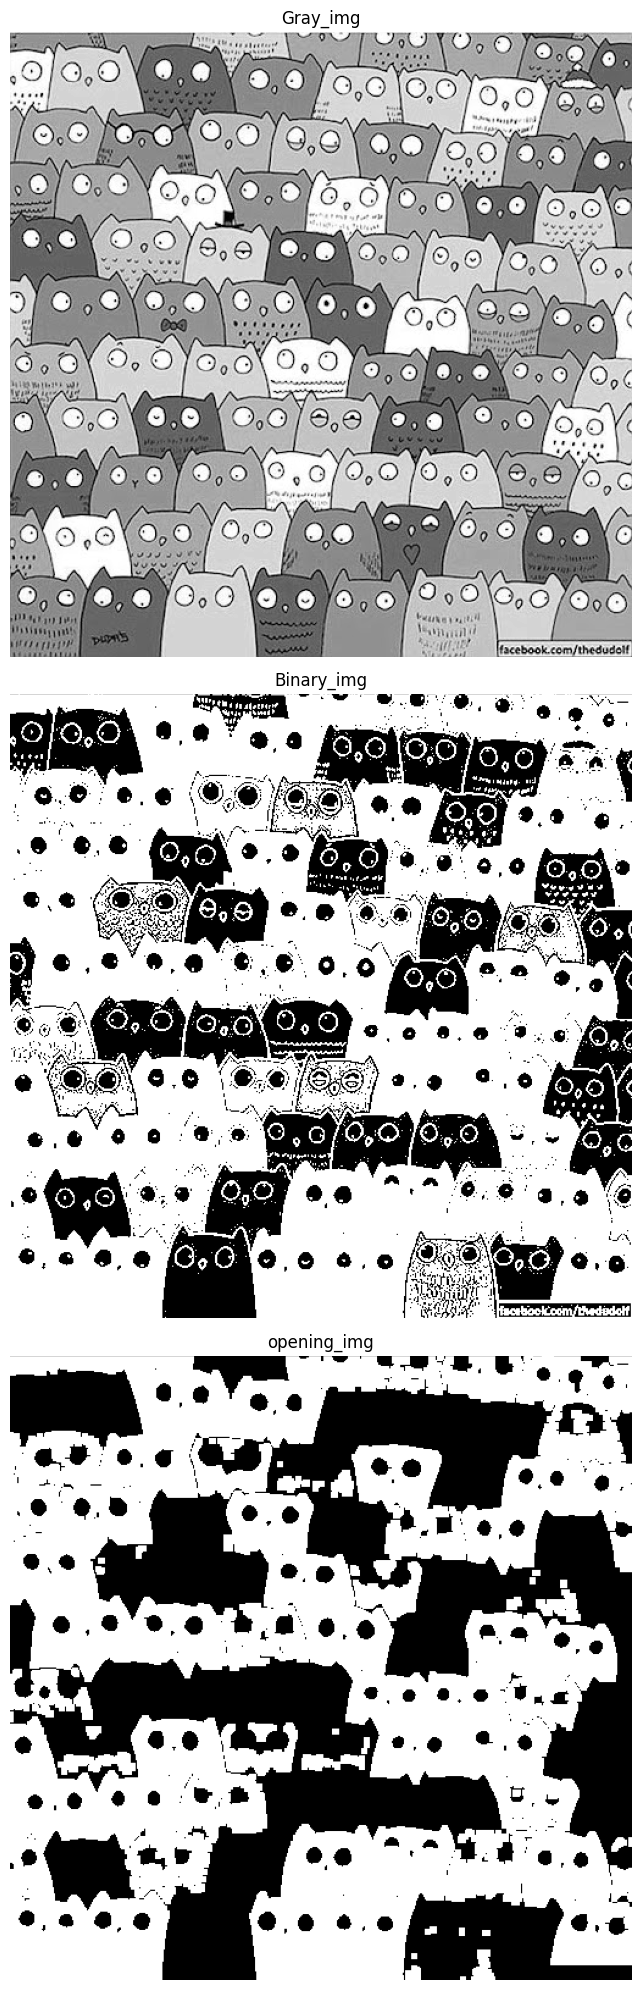

In [117]:
num_labels, labeled_image = cv2.connectedComponents(opened_image)
fig, axs = plt.subplots(3, 1, figsize=(10, 20))

axs[0].imshow(image, cmap='gray')
axs[0].set_title("Gray_img")

axs[1].imshow(binary_image, cmap='gray')
axs[1].set_title("Binary_img")

axs[2].imshow(opened_image, cmap='gray')
axs[2].set_title("opening_img")


for ax in axs:
    ax.axis("off")
print(f'{num_labels}')

plt.tight_layout()
plt.show()


## Sử dụng các phương pháp lọc cạnh

In [118]:
image_path = "Counting/cat.jpg" 

In [119]:
# Phát hiện cạnh Sobel
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

In [120]:
# Phát hiện cạnh Prewitt
image_float = np.float32(image)
prewitt_x = cv2.filter2D(image_float, -1, np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=np.float32))
prewitt_y = cv2.filter2D(image_float, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=np.float32))
prewitt = cv2.magnitude(prewitt_x, prewitt_y)

In [121]:
#Phát hiện cạnh Roberts
roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
roberts_x = cv2.filter2D(image_float, -1, roberts_kernel_x)
roberts_y = cv2.filter2D(image_float, -1, roberts_kernel_y)
roberts = cv2.magnitude(roberts_x, roberts_y)
    

In [122]:
#Phát hiện cạnh Canny
canny = cv2.Canny(image, 50, 150)

In [123]:
# Đếm số lượng vật thể (bằng cách tìm contours) và tô khung
ret, thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
object_count = len(contours)

In [124]:
# Tô khung cho các vật thể
image_colored = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
for contour in contours:
    # Tính bounding box
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image_colored, (x, y), (x + w, y + h), (0, 255, 0), 2)

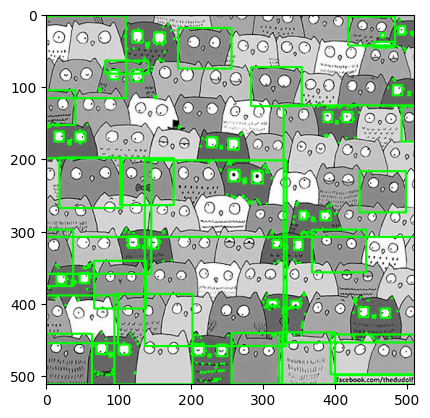

In [125]:
plt.imshow(image_colored)

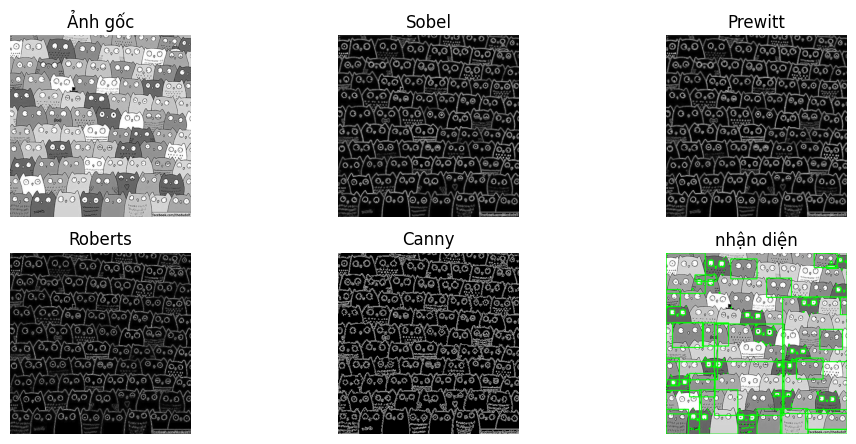

409


In [126]:
titles = ['Ảnh gốc', 'Sobel', 'Prewitt', 'Roberts', 'Canny', 'nhận diện']
images = [image, sobel, prewitt, roberts, canny, image_colored]

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i], cmap='gray' if i != 5 else None)
    plt.title(titles[i])
    plt.axis('off')
plt.show()
print(f"{object_count}")



## Sử dụng Template Matching


In [127]:
image_path = "Counting\cat.jpg"
img = cv2.imread(image_path)
img_resized = cv2.resize(img, (800, 800))
gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\hquan\AppData\Local\Temp\ipykernel_23984\91037618.py:1: SyntaxWarning: invalid escape sequence '\c'
  image_path = "Counting\cat.jpg"


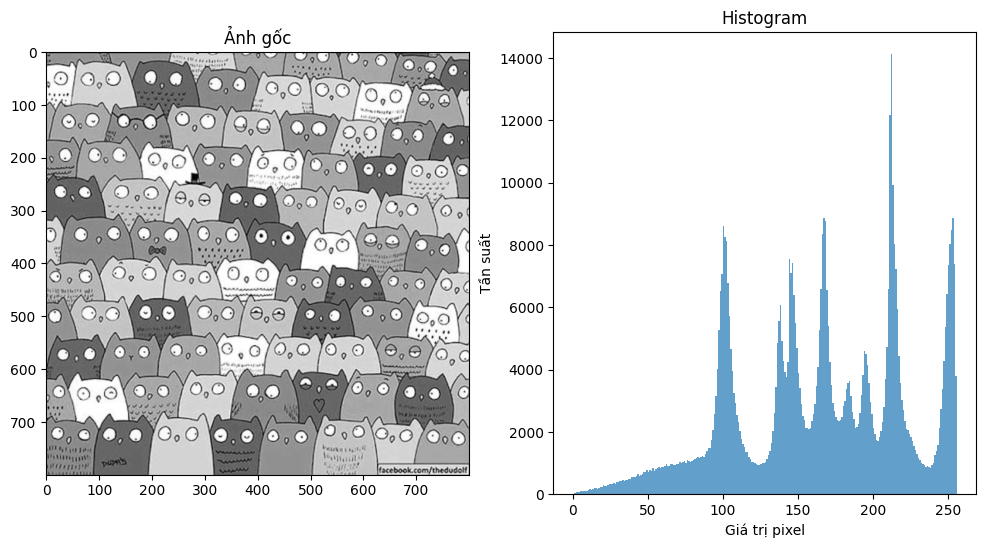

In [128]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.title("Ảnh gốc")


plt.subplot(1, 2, 2)
plt.hist(gray.ravel(), bins=256, range=(0, 256), alpha=0.7)
plt.title("Histogram")
plt.xlabel('Giá trị pixel')
plt.ylabel('Tần suất')

plt.show()

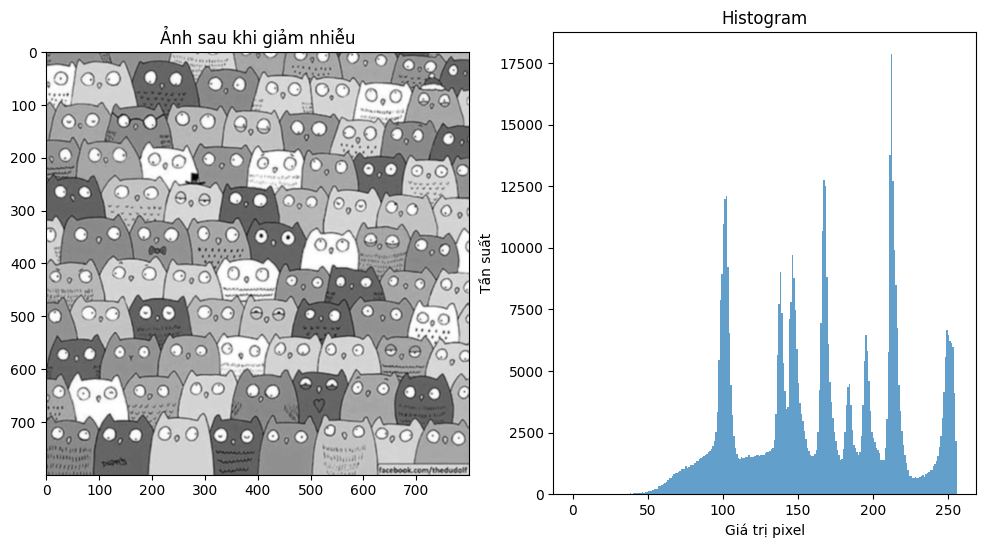

In [129]:
# Áp dụng GaussianBlur để giảm nhiễu
blur = cv2.GaussianBlur(gray, (5, 5), 0)


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(blur, cmap='gray')
plt.title("Ảnh sau khi giảm nhiễu")


plt.subplot(1, 2, 2)
plt.hist(blur.ravel(), bins=256, range=(0, 256), alpha=0.7)
plt.title("Histogram")
plt.xlabel('Giá trị pixel')
plt.ylabel('Tần suất')

plt.show()

(np.float64(-0.5), np.float64(799.5), np.float64(799.5), np.float64(-0.5))

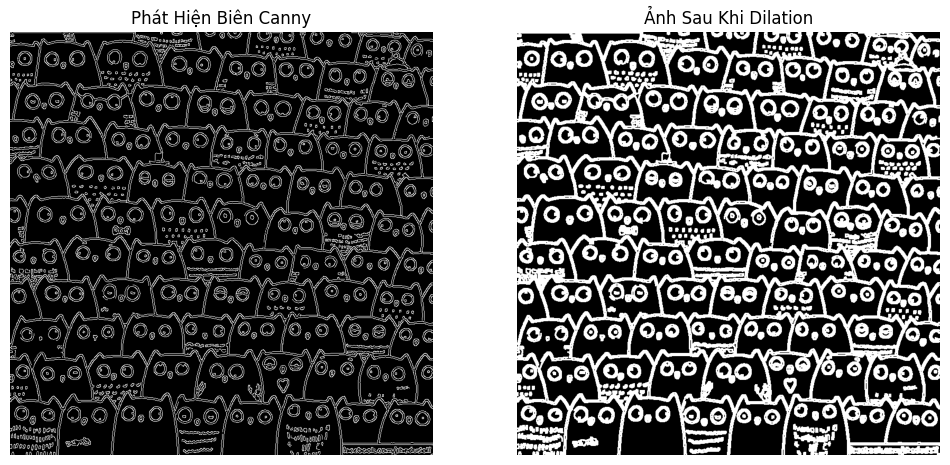

In [130]:
# Áp dụng phát hiện biên Canny
edges = cv2.Canny(blur, 50, 150)

# Dùng dilate để loại bỏ chi tiết nhỏ bên trong
kernel = np.ones((3, 3), np.uint8)
processed = cv2.dilate(edges, kernel, iterations=1)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title("Phát Hiện Biên Canny")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(processed, cmap='gray')
plt.title("Ảnh Sau Khi Dilation")
plt.axis('off')

In [131]:
template = processed[640:670, 90:110]  # Template tọa độ mũi mèo
w, h = template.shape[::-1]

In [132]:
# Áp dụng Template Matching trên ảnh đã xử lý
res = cv2.matchTemplate(processed, template, cv2.TM_CCOEFF_NORMED)

threshold = 0.5  # Điều chỉnh threshold để tìm mức phù hợp
loc = np.where(res >= threshold)

#Loại bỏ các điểm trùng lặp do nhận diện gần nhau
unique_locations = []
distance_threshold = 20  #Ngưỡng khoảng cách giữa các điểm
for pt in zip(*loc[::-1]):
    if all(np.linalg.norm(np.array(pt) - np.array(p)) > distance_threshold for p in unique_locations):
        unique_locations.append(pt)

# Đếm số lượng mèo được phát hiện
num_objects = len(unique_locations)

# Trực quan việc phát hiện mũi mèo
result_img = processed.copy()
for pt in unique_locations:
    cv2.rectangle(result_img, pt, (pt[0] + w, pt[1] + h), 255, 2)
print(f"Tổng số lượng mèo đếm được: {num_objects}")


Tổng số lượng mèo đếm được: 105


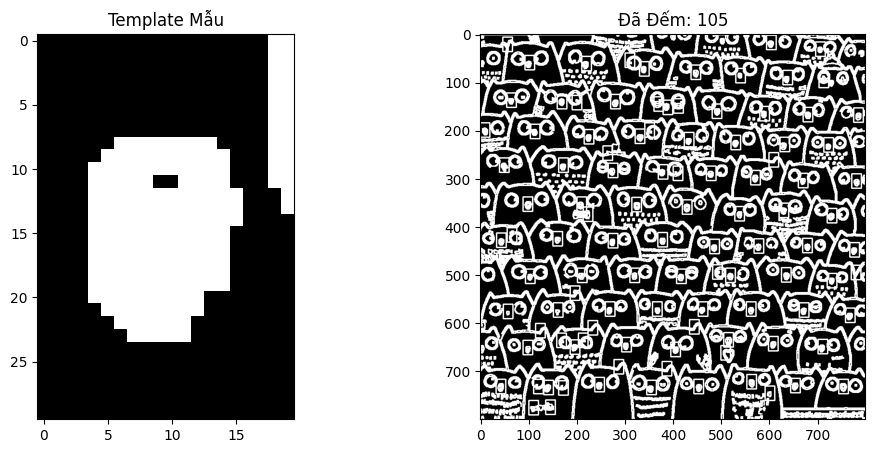

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(template, cmap='gray')
axs[0].set_title("Template Mẫu")

axs[1].imshow(result_img, cmap='gray')
axs[1].set_title(f"Đã Đếm: {num_objects}")

plt.show()